# Decision Trees - ID3, CART, Random Forest & XGBoost

BITS F464 Assignment 2

### Importing and Installing Dependencies

In [ ]:
# !poetry add pandas
# !poetry add numpy
# !poetry add matplotlib
# !poetry add seaborn
# !poetry add scikit-learn
# !poetry add tensorflow
# !poetry add keras
# !poetry add tensorflow_decision_forests
# !poetry add graphviz pydot
# !poetry add imblearn
# !poetry add ydf


# Uncomment if ur using pip instead
# %pip install pandas
# %pip install numpy
# %pip install matplotlib
# %pip install seaborn
# %pip install scikit-learn
%pip install tensorflow
# # %pip install keras
%pip install tensorflow_decision_forests
# # %pip install imblearn
# %pip install ydf

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.5/15.5 MB 40.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.2/9.2 MB 57.6 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Importing Data

In [ ]:
df1 = pd.read_csv('221.csv')
df2 = pd.read_csv('230.csv')

In [ ]:
df1.head()

RESP  BP-S  BP-D  SpO2  HR  PULSE  Anomaly
0    28    81   120    98  74     73        0
1    29    81   120    98  74     73        0
2    30    81   120    98  74     73        0
3    30    81   120    99  74     73        0
4    29    81   120    99  73     73        0

In [ ]:
df2.head()

RESP  BP-S  BP-D  SpO2  HR  PULSE  Anomaly
0    15    54    73    97  72     71        0
1    15    54    73    97  72     71        0
2    15    54    73    97  72     71        0
3    15    54    73    97  72     71        0
4    15    55    74    97  72     71        0

### Data Preprocessing

In [ ]:
print(f"Patient 1 Shape: {df1.shape}")
print(f"Patient 2 Shape: {df2.shape}")

Patient 1 Shape: (24999, 7)
Patient 2 Shape: (25000, 7)


In [ ]:
df1.describe()

RESP          BP-S          BP-D          SpO2            HR  \
count  24999.000000  24999.000000  24999.000000  24999.000000  24999.000000   
mean      23.763951     83.889756    121.411656     99.041282     88.562342   
std        4.492832      4.746617      8.966590      1.304528      9.592311   
min        0.000000     66.000000     88.000000      0.000000      0.000000   
25%       21.000000     81.000000    114.000000     98.000000     81.000000   
50%       23.000000     83.000000    121.000000     99.000000     88.000000   
75%       26.000000     87.000000    129.000000    100.000000     95.000000   
max       42.000000    127.000000    170.000000    100.000000    120.000000   

              PULSE       Anomaly  
count  24999.000000  24999.000000  
mean      87.975439      0.065683  
std        9.219837      0.247731  
min        0.000000      0.000000  
25%       81.000000      0.000000  
50%       88.000000      0.000000  
75%       95.000000      0.000000  
max      119.000000      1.000000

In [ ]:
df2.describe()

RESP          BP-S          BP-D          SpO2            HR  \
count  25000.000000  25000.000000  25000.000000  25000.000000  25000.000000   
mean      17.621400     53.966440     73.920600     94.526280     77.004120   
std        3.560338      7.752623     10.038658      2.137993      6.611137   
min        0.000000     37.000000     52.000000     81.000000      0.000000   
25%       15.000000     50.000000     67.000000     93.000000     73.000000   
50%       17.000000     54.000000     73.000000     94.000000     76.000000   
75%       20.000000     60.000000     82.000000     96.000000     79.000000   
max       42.000000    211.000000    217.000000     99.000000    131.000000   

              PULSE       Anomaly  
count  25000.000000  25000.000000  
mean      76.180320      0.031480  
std        5.954691      0.174615  
min       54.000000      0.000000  
25%       72.000000      0.000000  
50%       75.000000      0.000000  
75%       79.000000      0.000000  
max      128.000000      1.000000

In [ ]:
print(f"Categorical Columns: {df1.select_dtypes(include=['object']).columns}")
print(f"Numerical Columns: {df1.select_dtypes(include=['number']).columns}")

Categorical Columns: Index([], dtype='object')
Numerical Columns: Index(['RESP', 'BP-S', 'BP-D', 'SpO2', 'HR', 'PULSE', 'Anomaly'], dtype='object')


In [ ]:
print(f"Categorical Columns: {df2.select_dtypes(include=['object']).columns}")
print(f"Numerical Columns: {df2.select_dtypes(include=['number']).columns}")

Categorical Columns: Index([], dtype='object')
Numerical Columns: Index(['RESP', 'BP-S', 'BP-D', 'SpO2', 'HR', 'PULSE', 'Anomaly'], dtype='object')


#### Missing Values && Duplicates

In [ ]:
print(f"Patient 1 Duplicate Count: {df1.duplicated().sum()}")

df1.isnull().sum()

Patient 1 Duplicate Count: 9445


RESP       0
BP-S       0
BP-D       0
SpO2       0
HR         0
PULSE      0
Anomaly    0
dtype: int64

In [ ]:
print(f"Patient 2 Duplicate Count: {df2.duplicated().sum()}")

df2.isnull().sum()

Patient 2 Duplicate Count: 16551


RESP       0
BP-S       0
BP-D       0
SpO2       0
HR         0
PULSE      0
Anomaly    0
dtype: int64

- No Missing Values in both Patient 1 and 2

#### Outlier Detection and Removal using IQR

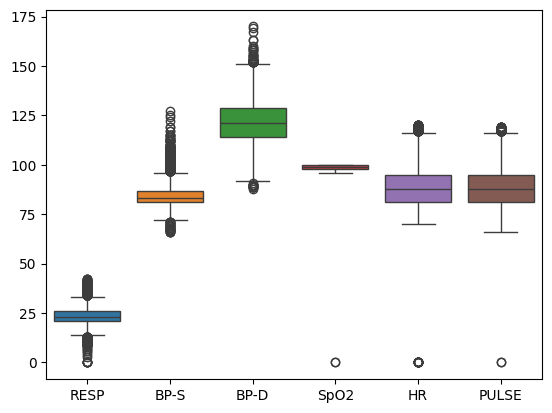

Number of outliers per attribute: 
RESP     1032
BP-S      465
BP-D       74
SpO2        2
HR        101
PULSE      75
dtype: int64


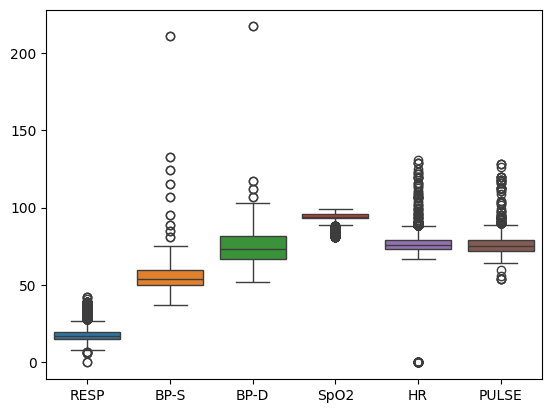

Number of outliers per attribute: 
RESP      389
BP-S       18
BP-D        8
SpO2      383
HR       1469
PULSE     131
dtype: int64


In [ ]:
# IQR method will wrongly flag records of anomaly column as outliers since its IQR = 0, hence, we will only find outliers for other columns

# visually see outliers in df1 using IQR method
df1_new = df1.drop(columns=["Anomaly"])
sns.boxplot(data=df1_new)
plt.show()
# find outliers in df1
Q1 = df1_new.quantile(0.25)
Q3 = df1_new.quantile(0.75)
IQR = Q3 - Q1
outliers = (df1_new < (Q1 - 1.5 * IQR)) | (df1_new > (Q3 + 1.5 * IQR))
print("Number of outliers per attribute: \n", outliers.sum(), sep="")
# remove rows that have outliers in df1
df1 = df1[~outliers.any(axis=1)]
# sns.boxplot(data=df1)
# plt.show()


# visually see outliers in df2 using IQR method
df2_new = df2.drop(columns=["Anomaly"])
sns.boxplot(data=df2_new)
plt.show()
# find outliers in df2
Q1 = df2_new.quantile(0.25)
Q3 = df2_new.quantile(0.75)
IQR = Q3 - Q1
outliers = (df2_new < (Q1 - 1.5 * IQR)) | (df2_new > (Q3 + 1.5 * IQR))
print("Number of outliers per attribute: \n", outliers.sum(), sep="")
# remove rows that have outliers in df2
df2 = df2[~outliers.any(axis=1)]
# sns.boxplot(data=df2)
# plt.show()

In [ ]:
df1.shape

(23571, 7)

In [ ]:
df2.shape

(22745, 7)

#### Visualizing Numerical Features

In [ ]:
def visualize_numerical(df):
    num_cols = df.select_dtypes(include=['number']).columns
    num_plots = len(num_cols)
    num_rows = (num_plots // 3) + (num_plots % 3 > 0)
    fig, ax = plt.subplots(num_rows, 3, figsize=(16, 5*num_rows))
    for i, feature in enumerate(num_cols):
        row = i // 3
        col = i % 3
        sns.histplot(data=df, x=feature, ax=ax[row, col], kde=True)
        ax[row, col].set_title(f'Distribution of {feature}')
    plt.tight_layout()

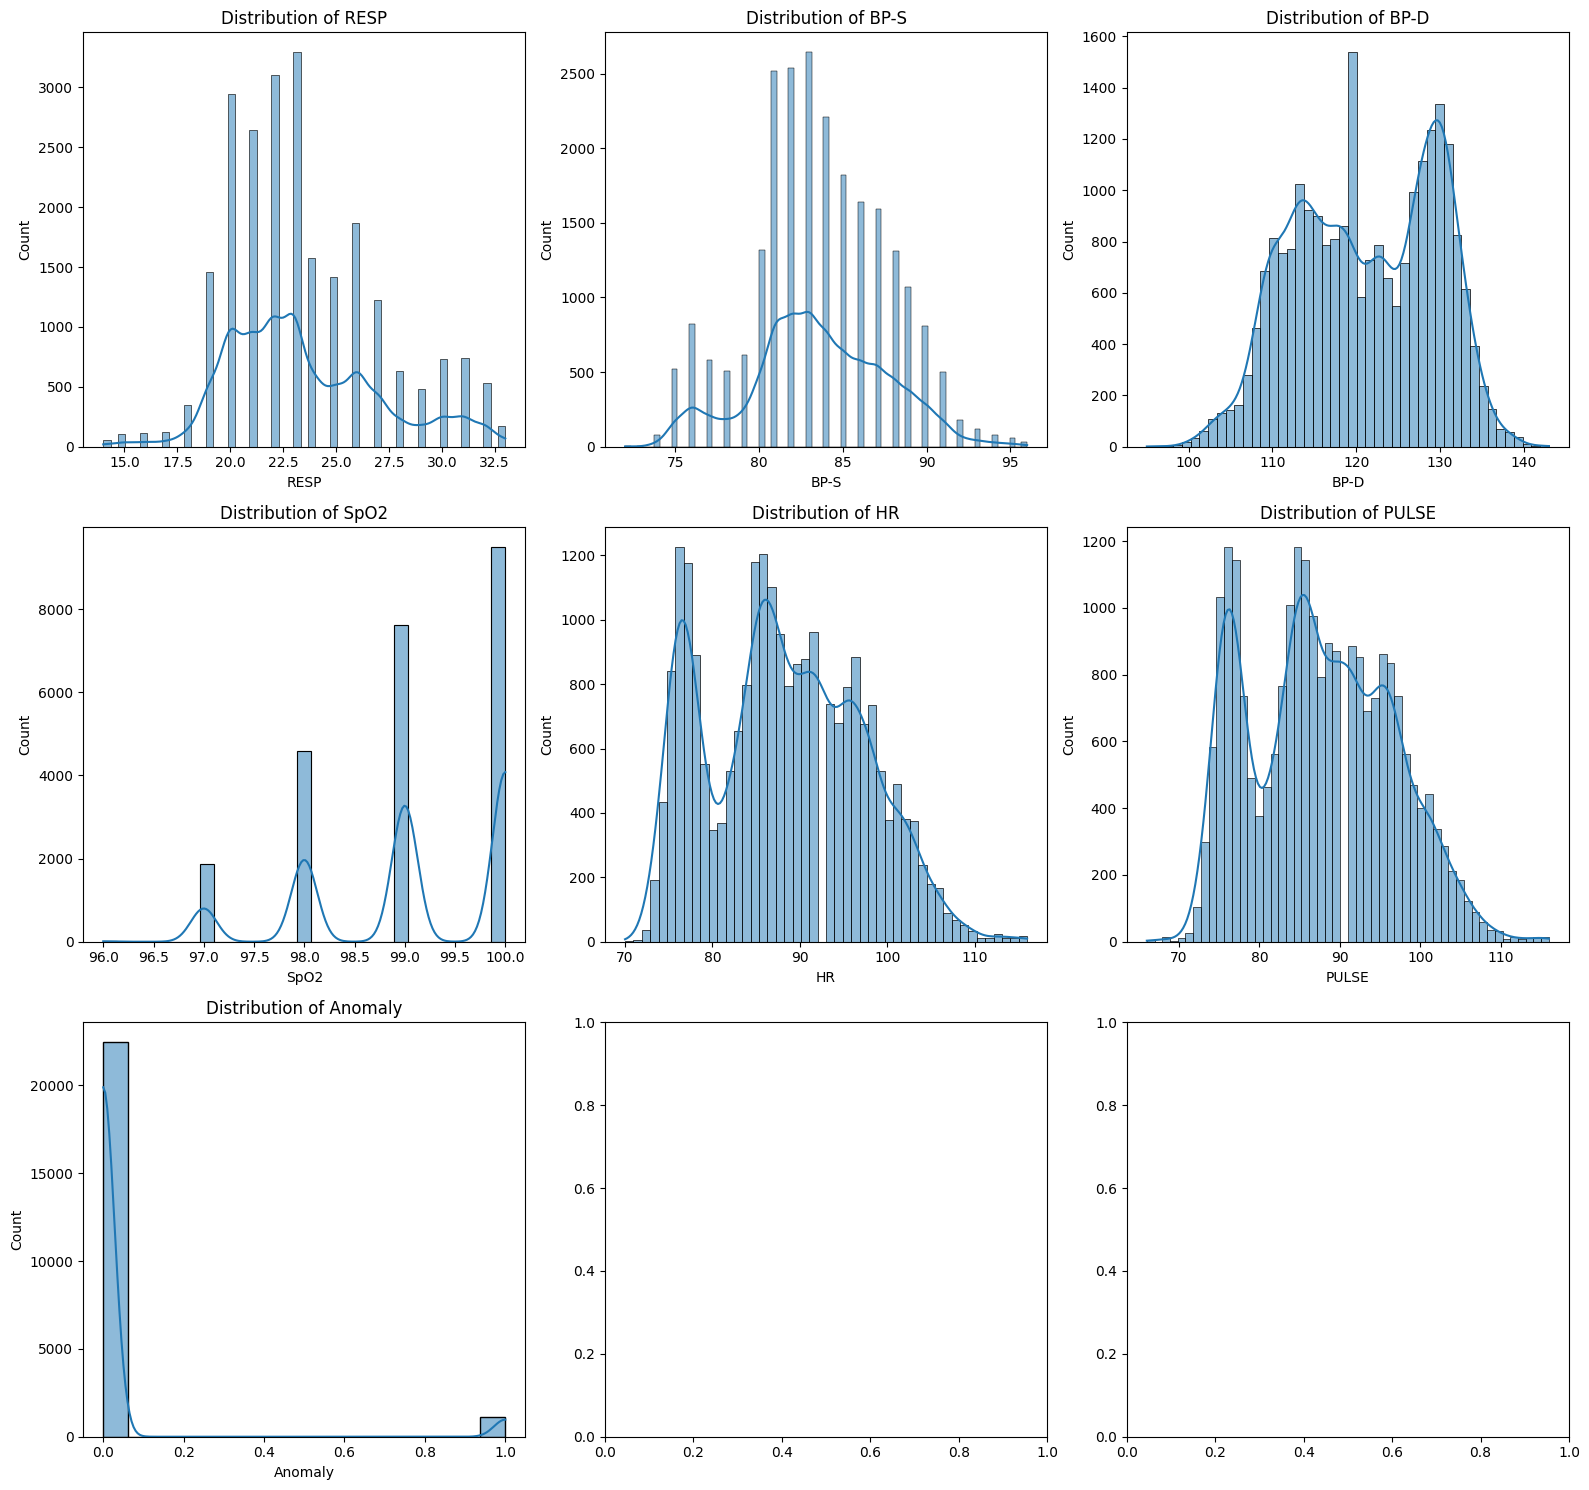

In [ ]:
visualize_numerical(df1)

For Patient 1 -
- We need to sample Anomaly to prevent bias

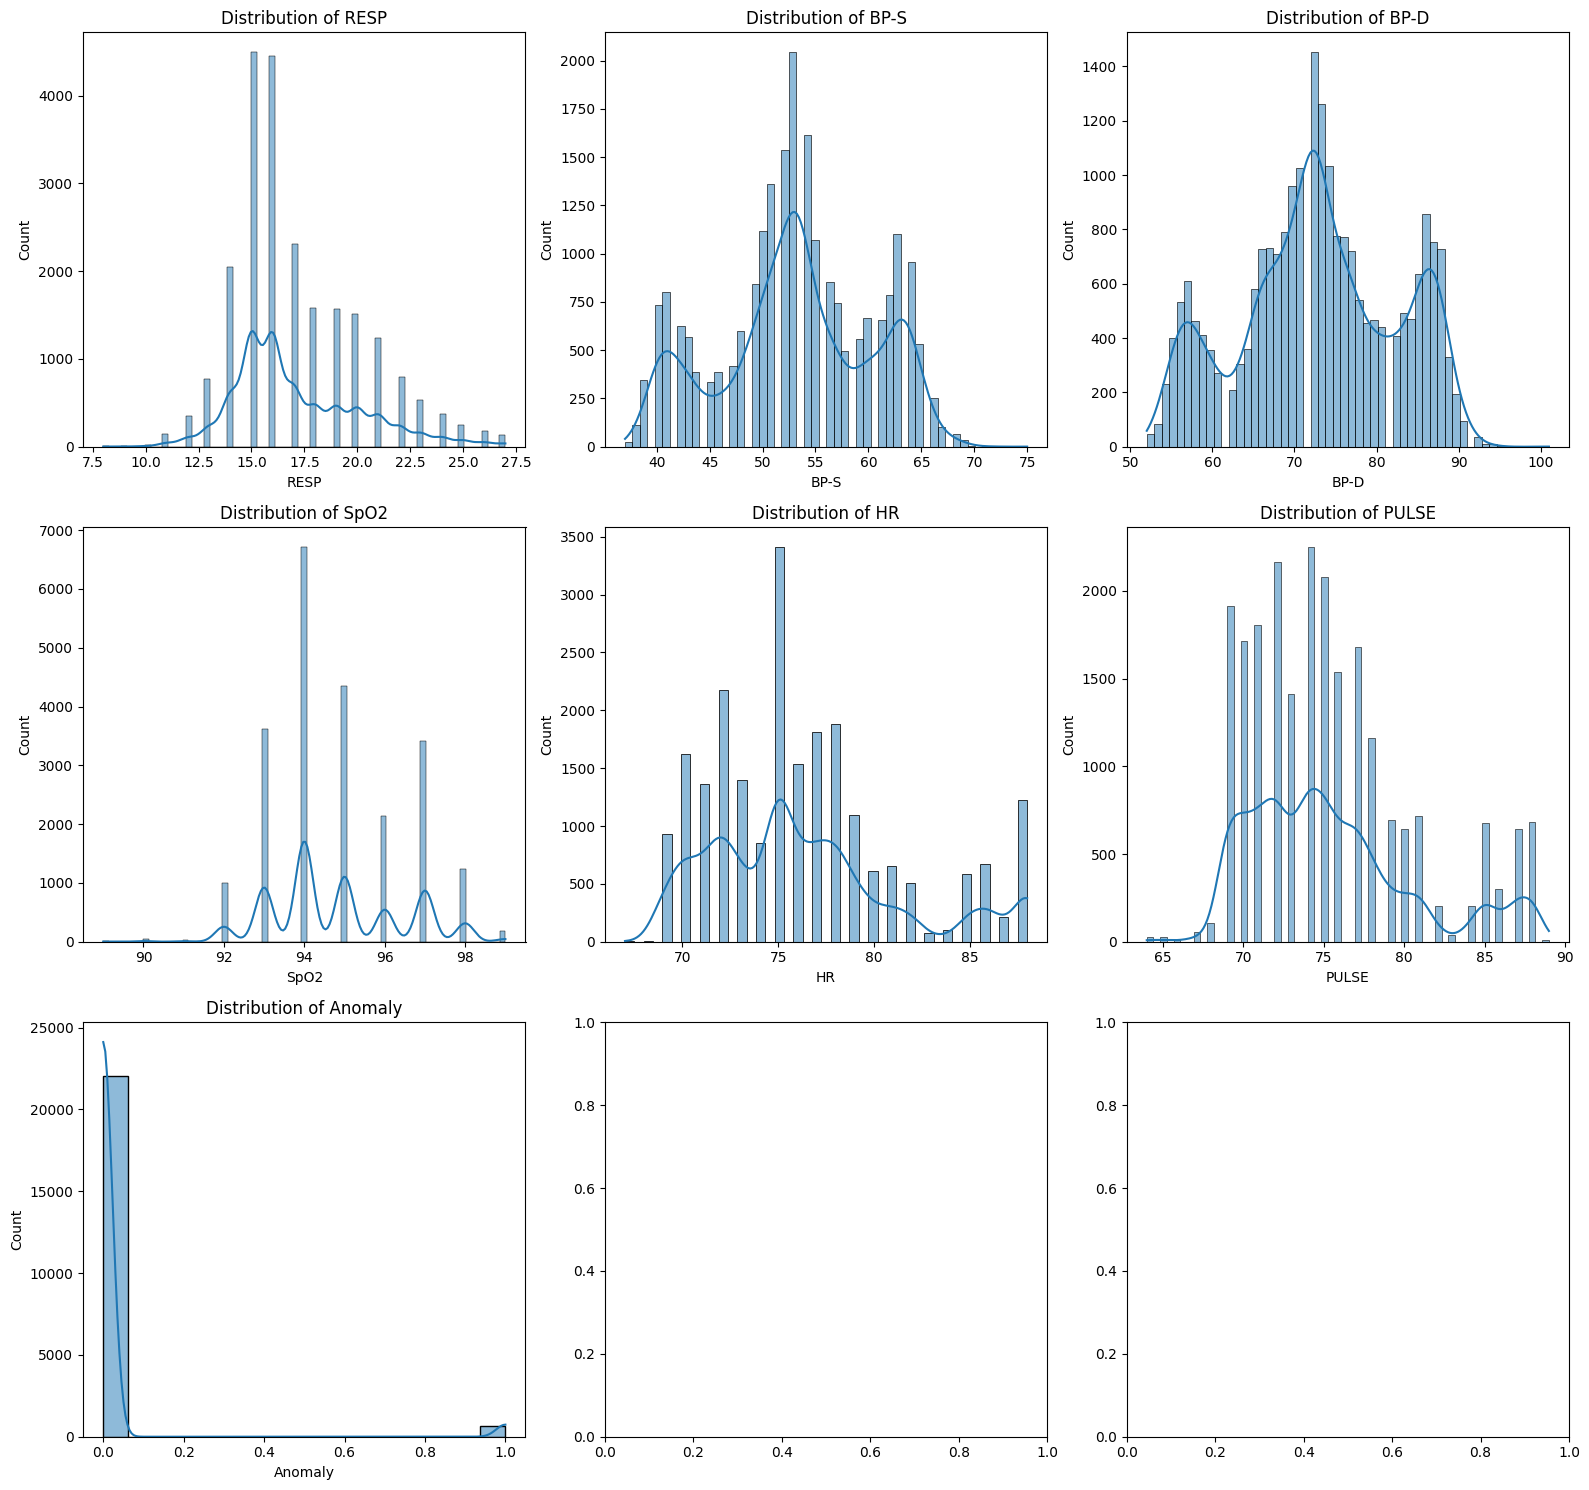

In [ ]:
visualize_numerical(df2)

For Patient 2 -
- We need to sample Anomaly to prevent bias

##### Feature Engineering

Feature engineering does not play a significant role in this dataset, as all attributes contribute important information. Dropping or combining attributes is unlikely to yield a more meaningful feature, since each variable holds value on its own.

Also it would increase the dimensionality of our dataset, which could hinder the model's performance by introducing complexity without adding meaningful insights.

##### Normalization

Since the values of all the features are of a similar order, there is no need for normalization

##### Correlation Matrix

In [ ]:
def visualize_correlation(df):
    fig,ax=plt.subplots(figsize=(12,8))

    num_features=df.select_dtypes(include='number')
    sns.heatmap(num_features.corr(),annot=True,ax=ax, cmap='BuPu')
    plt.show()

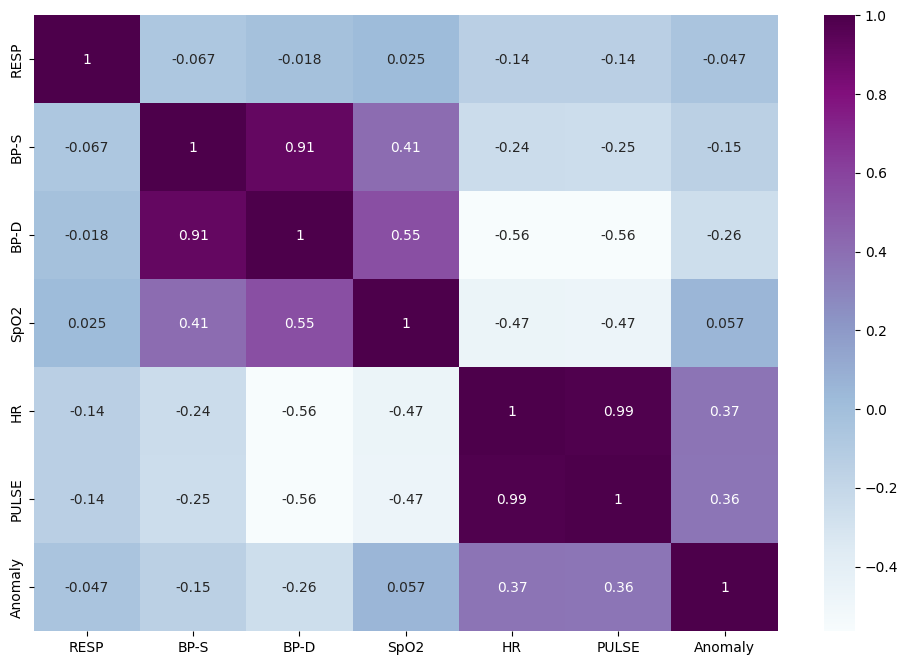

In [ ]:
visualize_correlation(df1)

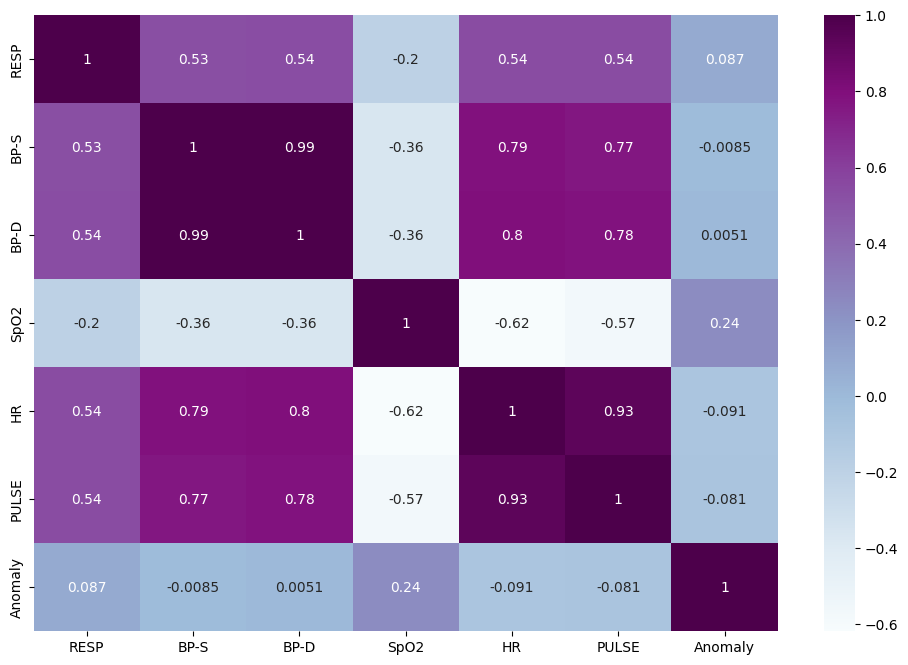

In [ ]:
visualize_correlation(df2)

For Patient 1 -
- HR and PULSE have the highest correlation with Anomaly

For Patient 2 -
- SPO2 has significant correlation with Anomaly

#### Splitting Data

In [ ]:
from sklearn.model_selection import train_test_split

def split_data(df,outcome):
    X = df.drop(outcome, axis=1)
    y = df[outcome]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=106)
    return X_train, X_test, y_train, y_test

### ID3 Classifier

In [ ]:
def test_and_predict(df,model,outcome):
    X_train, X_test, y_train, y_test = split_data(df,outcome)
    model.fit(X_train, y_train)
    pred = model.predict(X_test)

    from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
    accuracy = accuracy_score(y_test, pred)
    report = classification_report(y_test, pred)
    conf_matrix = confusion_matrix(y_test, pred)

    return accuracy, report, conf_matrix

In [ ]:
def show_results(df,model,outcome):
    accuracy, report, conf_matrix = test_and_predict(df,model,outcome)
    print(f"Accuracy: {accuracy}")
    print(f"Report: {report}")

    plt.figure(figsize=(10, 7))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='BuPu', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

#### Using Custom ID3 Implementation

In [ ]:
import math

class Node:
    def __init__(self, feature=None, threshold=None, value=None, children=None):
        self.feature = feature # feature on which its split
        self.threshold = threshold # numerical val at which its split
        self.value = value # label of leaf nodes
        self.children = children if children is not None else {}

class DecisionTreeClassifier:
    def __init__(self):
        self.root = None

    def fit(self, X, y):
        data = X.copy()

        # label = predicted column
        data['label'] = y
        self.root = self._build_tree(data)

    def _build_tree(self, data):

        # all data points have same label,make node that value
        if len(data['label'].unique()) == 1:
            return Node(value=data['label'].iloc[0])

        # no more features to split on, make node with most common label
        if data.shape[1] == 1:
            return Node(value=data['label'].mode()[0])

        best_feature, best_threshold = self._find_best_split(data)

        # no more information gain, make node with most common label
        if best_feature is None:
            return Node(value=data['label'].mode()[0])

        node = Node(feature=best_feature, threshold=best_threshold)

        # split data acc to <= and > threshold
        left_data = data[data[best_feature] <= best_threshold].drop(columns=[best_feature])
        right_data = data[data[best_feature] > best_threshold].drop(columns=[best_feature])

        node.children['left'] = self._build_tree(left_data)
        node.children['right'] = self._build_tree(right_data)

        return node

    def _find_best_split(self, data):
        best_feature = None
        best_threshold = None
        best_info_gain = -float('inf')

        for feature in data.columns[:-1]:
            thresholds = data[feature].unique()

            # check info gain for each unique value of feature
            for threshold in thresholds:
                info_gain = self._information_gain(data, feature, threshold)
                if info_gain > best_info_gain:
                    best_info_gain = info_gain
                    best_feature = feature
                    best_threshold = threshold

        return best_feature, best_threshold

    def _entropy(self, data):
        labels = data['label']
        label_counts = labels.value_counts()
        entropy = 0
        for count in label_counts:
            probability = count / len(labels)
            entropy -= probability * math.log2(probability)
        return entropy

    def _information_gain(self, data, feature, threshold):
        parent_entropy = self._entropy(data)
        left_data = data[data[feature] <= threshold]
        right_data = data[data[feature] > threshold]

        if len(left_data) == 0 or len(right_data) == 0:
            return 0

        # info gain = parent entropy - weighted avg of child entropies
        left_entropy = self._entropy(left_data)
        right_entropy = self._entropy(right_data)
        weighted_avg_entropy = (len(left_data) / len(data)) * left_entropy + (len(right_data) / len(data)) * right_entropy

        return parent_entropy - weighted_avg_entropy

    def predict(self, X):
        return X.apply(self._predict_row, axis=1)

    def _predict_row(self, row):
        node = self.root

        # search for label like binary tree search
        while node.value is None:
            if row[node.feature] <= node.threshold:
                node = node.children['left']
            else:
                node = node.children['right']
        return node.value

    def export_tree(self):
        return self._recurse(self.root)

    def _recurse(self,node):
        if node.value is not None:
            return node.value
        return {
            'feature': node.feature,
            'threshold': node.threshold,
            'left': self._recurse(node.children['left']),
            'right': self._recurse(node.children['right'])
        }

Accuracy: 0.9868504772004242
Report:               precision    recall  f1-score   support

           0       0.99      1.00      0.99      4487
           1       0.95      0.77      0.85       228

    accuracy                           0.99      4715
   macro avg       0.97      0.88      0.92      4715
weighted avg       0.99      0.99      0.99      4715



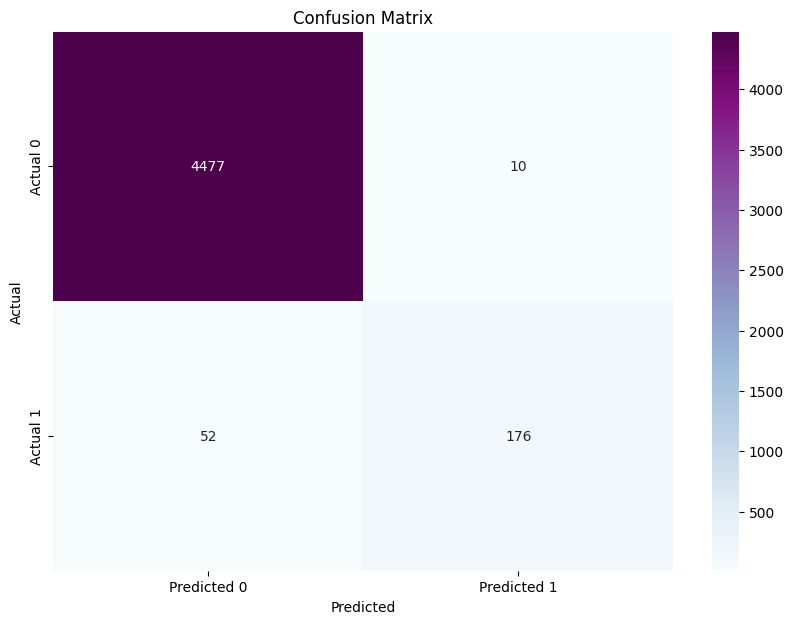

Tree: 
{'feature': 'BP-D', 'threshold': 106, 'left': {'feature': 'PULSE', 'threshold': 99, 'left': {'feature': 'HR', 'threshold': 89, 'left': 0, 'right': {'feature': 'RESP', 'threshold': 22, 'left': 0, 'right': {'feature': 'BP-S', 'threshold': 76, 'left': {'feature': 'SpO2', 'threshold': 98, 'left': 1, 'right': 1}, 'right': {'feature': 'SpO2', 'threshold': 98, 'left': 1, 'right': 0}}}}, 'right': {'feature': 'SpO2', 'threshold': 98, 'left': {'feature': 'BP-S', 'threshold': 76, 'left': 1, 'right': {'feature': 'HR', 'threshold': 102, 'left': 1, 'right': {'feature': 'RESP', 'threshold': 23, 'left': 1, 'right': 0}}}, 'right': 1}}, 'right': {'feature': 'HR', 'threshold': 103, 'left': {'feature': 'BP-S', 'threshold': 90, 'left': {'feature': 'PULSE', 'threshold': 82, 'left': 0, 'right': {'feature': 'SpO2', 'threshold': 98, 'left': {'feature': 'RESP', 'threshold': 27, 'left': 0, 'right': 0}, 'right': {'feature': 'RESP', 'threshold': 26, 'left': 0, 'right': 0}}}, 'right': {'feature': 'PULSE', 't

In [ ]:
from sklearn.tree import plot_tree

id3c_model = DecisionTreeClassifier()
show_results(df1,id3c_model,'Anomaly')

print("Tree: ")
print(id3c_model.export_tree())

#### Using Sklearn's ID3

Accuracy: 0.9938494167550371
Report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00      4487
           1       0.94      0.93      0.94       228

    accuracy                           0.99      4715
   macro avg       0.97      0.97      0.97      4715
weighted avg       0.99      0.99      0.99      4715



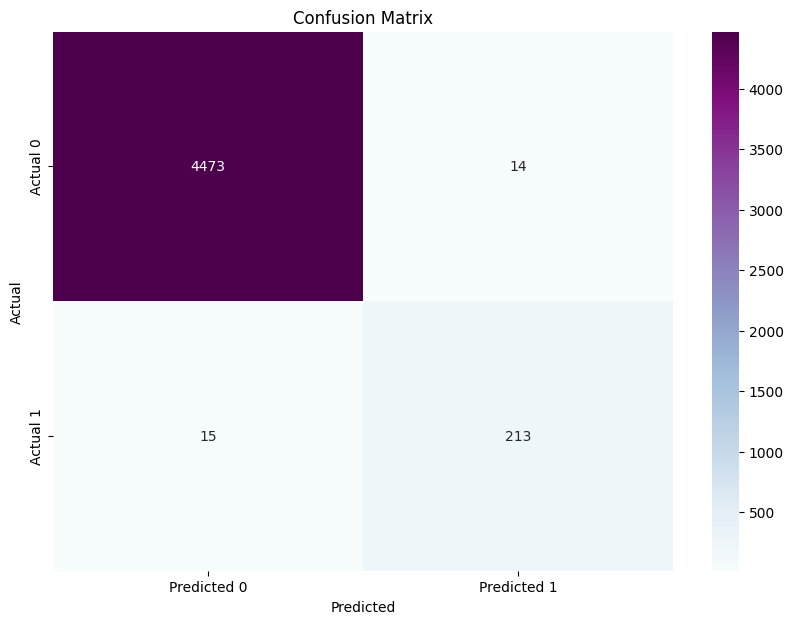

In [ ]:
from sklearn.tree import DecisionTreeClassifier

skid3_model=DecisionTreeClassifier(criterion='entropy')
show_results(df1,skid3_model,'Anomaly')

### CART Classifier

#### Using Sklearn's CART

Accuracy: 0.9973620575950758
Report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00      4413
           1       0.97      0.94      0.96       136

    accuracy                           1.00      4549
   macro avg       0.98      0.97      0.98      4549
weighted avg       1.00      1.00      1.00      4549



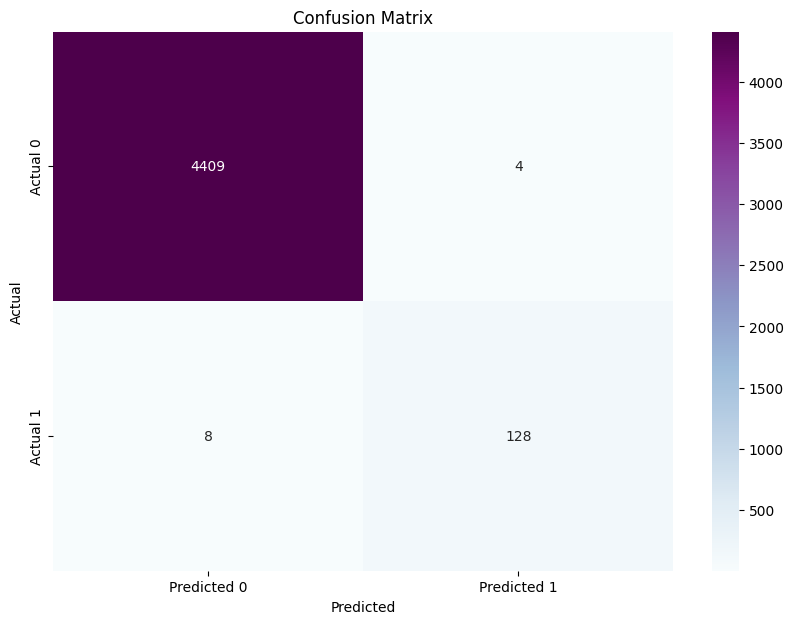

In [ ]:
from sklearn.tree import DecisionTreeClassifier

skcart_model=DecisionTreeClassifier(criterion='gini')
show_results(df2,skcart_model,'Anomaly')

#### CART using Tensorflow's CART Model

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import tensorflow_decision_forests as tfdf


df_train, df_test = train_test_split(df2, test_size=0.2, random_state=42)

tf_train_dataset = tfdf.keras.pd_dataframe_to_tf_dataset(df_train, label="Anomaly")
tf_test_dataset = tfdf.keras.pd_dataframe_to_tf_dataset(df_test, label="Anomaly")

tfdfcart_model=tfdf.keras.CartModel()
res=tfdfcart_model.fit(tf_train_dataset)

print(f"Accuracy: {res.history['accuracy'][0]}")

tfdf.model_plotter.plot_model_in_colab(tfdfcart_model, max_depth=5)


Use /tmp/tmpcp78k4fa as temporary training directory
Reading training dataset...
Training dataset read in 0:00:05.688602. Found 18196 examples.
Training model...
Model trained in 0:00:00.102112
Compiling model...
Model compiled.
Accuracy: 0.9960959286112661


#### Using ydf's CART (Same as TFDF)

In [ ]:
from ydf import DecisionTreeLearner,Task

X_train, X_test, y_train, y_test = split_data(df=df2,outcome='Anomaly')

X_train['Anomaly'] = y_train
X_test['Anomaly'] = y_test

ydfcart_model = DecisionTreeLearner(label='Anomaly',task=Task.CLASSIFICATION).train(X_train)

Train model on 18196 examples
Model trained in 0:00:00.039510


In [ ]:
res = ydfcart_model.evaluate(X_test)
res

Evaluation()

In [ ]:
ydfcart_model.print_tree()

'SpO2' >= 97.5 [score=0.024735 missing=False]
    ├─(pos)─ 'HR' >= 72.5 [score=0.059929 missing=True]
    │        ├─(pos)─ 'BP-D' >= 76 [score=0.12807 missing=False]
    │        │        ├─(pos)─ 'HR' >= 74.5 [score=0.53843 missing=True]
    │        │        │        ├─(pos)─ value=[0.0, 1.0]
    │        │        │        └─(neg)─ value=[0.99, 0.01]
    │        │        └─(neg)─ 'BP-D' >= 66.5 [score=0.47125 missing=True]
    │        │                 ├─(pos)─ value=[0.0, 1.0]
    │        │                 └─(neg)─ value=[0.9117647058823529, 0.08823529411764706]
    │        └─(neg)─ 'RESP' >= 18.5 [score=0.050835 missing=False]
    │                 ├─(pos)─ value=[0.13793103448275862, 0.8620689655172413]
    │                 └─(neg)─ 'BP-S' >= 54.5 [score=0.030453 missing=False]
    │                          ├─(pos)─ value=[1.0, 0.0]
    │                          └─(neg)─ 'SpO2' >= 98.5 [score=0.050068 missing=False]
    │                                   ├─(pos)─ value=[0

In [ ]:
plot = ydfcart_model.plot_tree(max_depth=5)
plot.to_file('rf_tree.html')

plot

### Comparing CART and ID3

- ID3 has accuracy of 99.43%, while CART has accuracy of 99.74%. This indicates that overall the predictions made by CART deviate less from actual values than ID3.
- ID3 has weighted avg precision of 0.99, while CART has 1.00. This indicates that the True Positive predictions made by CART are always correct, with no false positives or false negatives.
- Both models have perfect precision and recall for class 0, however, CART seems to perform slightly better than ID-3 in classfying instances of class 1 correctly and reducing false positives. This reflects in the weighted average, which adjusts for class imbalance.
- CART has higher accuracy compared to ID3, suggesting that CART may generalize better on this dataset than ID3.
- CART seems to have a slight edge over ID3, particularly in terms of accuracy and avoiding false positives. But ID3 is known for producing simpler, interpretable decision trees. Thus, since both the models have performed exceptionally well, both are strong contenders for this dataset.

Strengths and Weaknesses


1.   ID-3


*   Strenghts: ID-3 produces simpler, interpretable decision trees as it only produces univariate trees. It works well for simple datasets.
*   Weaknesses: As ID-3 uses Information Gain only, it is prone to overfitting on imbalanced datasets. It works better for categorical data.


2.   CART

*   Strengths: CART handles numerical attributes better than ID-3 and is better at generalizing (shown by it performing better in highly imbalanced datasets). It has methods for pruning (which helps control overfitting) as well as handles missing values.
*   Weaknesses: It can produce multivariate trees as well and so might be less interpretable than ID-3 sometimes.





### Random Forest

#### Random Forest model using TensorFlow's Decision Forests

In [ ]:
df_train, df_test = train_test_split(df2, test_size=0.2, random_state=42)

tf_train_dataset = tfdf.keras.pd_dataframe_to_tf_dataset(df_train, label="Anomaly")
tf_test_dataset = tfdf.keras.pd_dataframe_to_tf_dataset(df_test, label="Anomaly")

rfmodel=tfdf.keras.RandomForestModel()
res=rfmodel.fit(tf_train_dataset)

print(f"Accuracy:{res.history['accuracy'][0]}")

# PLOT

tfdf.model_plotter.plot_model_in_colab(rfmodel, tree_idx=0, max_depth=4)


Use /tmp/tmpx569rwkz as temporary training directory
Reading training dataset...
Training dataset read in 0:00:00.317532. Found 18196 examples.
Training model...
Model trained in 0:00:03.386779
Compiling model...
Model compiled.
Accuracy:0.9962079577929215


#### Using ydf's RandomForestLearner

In [ ]:
from ydf import RandomForestLearner

X_train, X_test, y_train, y_test = split_data(df=df1,outcome='Anomaly')

X_train['Anomaly'] = y_train
X_test['Anomaly'] = y_test

ydfrf_model = RandomForestLearner(label='Anomaly').train(X_train)

Train model on 18856 examples
Model trained in 0:00:05.135210


In [ ]:
evaluate = ydfrf_model.evaluate(X_test)

evaluate

Evaluation()

In [ ]:
ydfrf_model.print_tree()

'HR' >= 101.5 [score=0.07357 missing=False]
    ├─(pos)─ 'BP-D' >= 109.5 [score=0.37028 missing=True]
    │        ├─(pos)─ 'HR' >= 108.5 [score=0.17937 missing=False]
    │        │        ├─(pos)─ 'PULSE' >= 110.5 [score=0.21693 missing=False]
    │        │        │        ├─(pos)─ value=[0.0, 1.0]
    │        │        │        └─(neg)─ 'SpO2' >= 99.5 [score=0.48301 missing=False]
    │        │        │                 ├─(pos)─ 'RESP' >= 21 [score=0.18198 missing=True]
    │        │        │                 │    ...
    │        │        │                 └─(neg)─ value=[1.0, 0.0]
    │        │        └─(neg)─ 'BP-D' >= 114.5 [score=0.031626 missing=True]
    │        │                 ├─(pos)─ 'PULSE' >= 96.5 [score=0.014724 missing=False]
    │        │                 │        ├─(pos)─ value=[1.0, 0.0]
    │        │                 │        └─(neg)─ 'BP-S' >= 82.5 [score=0.11428 missing=True]
    │        │                 │             ...
    │        │                 └─(

In [ ]:
plot = ydfrf_model.plot_tree(max_depth=5)
plot.to_file('rf_tree.html')

plot

## Additional Tasks

### Visualising the hypothesis space by producing the scatter plot of the dataset

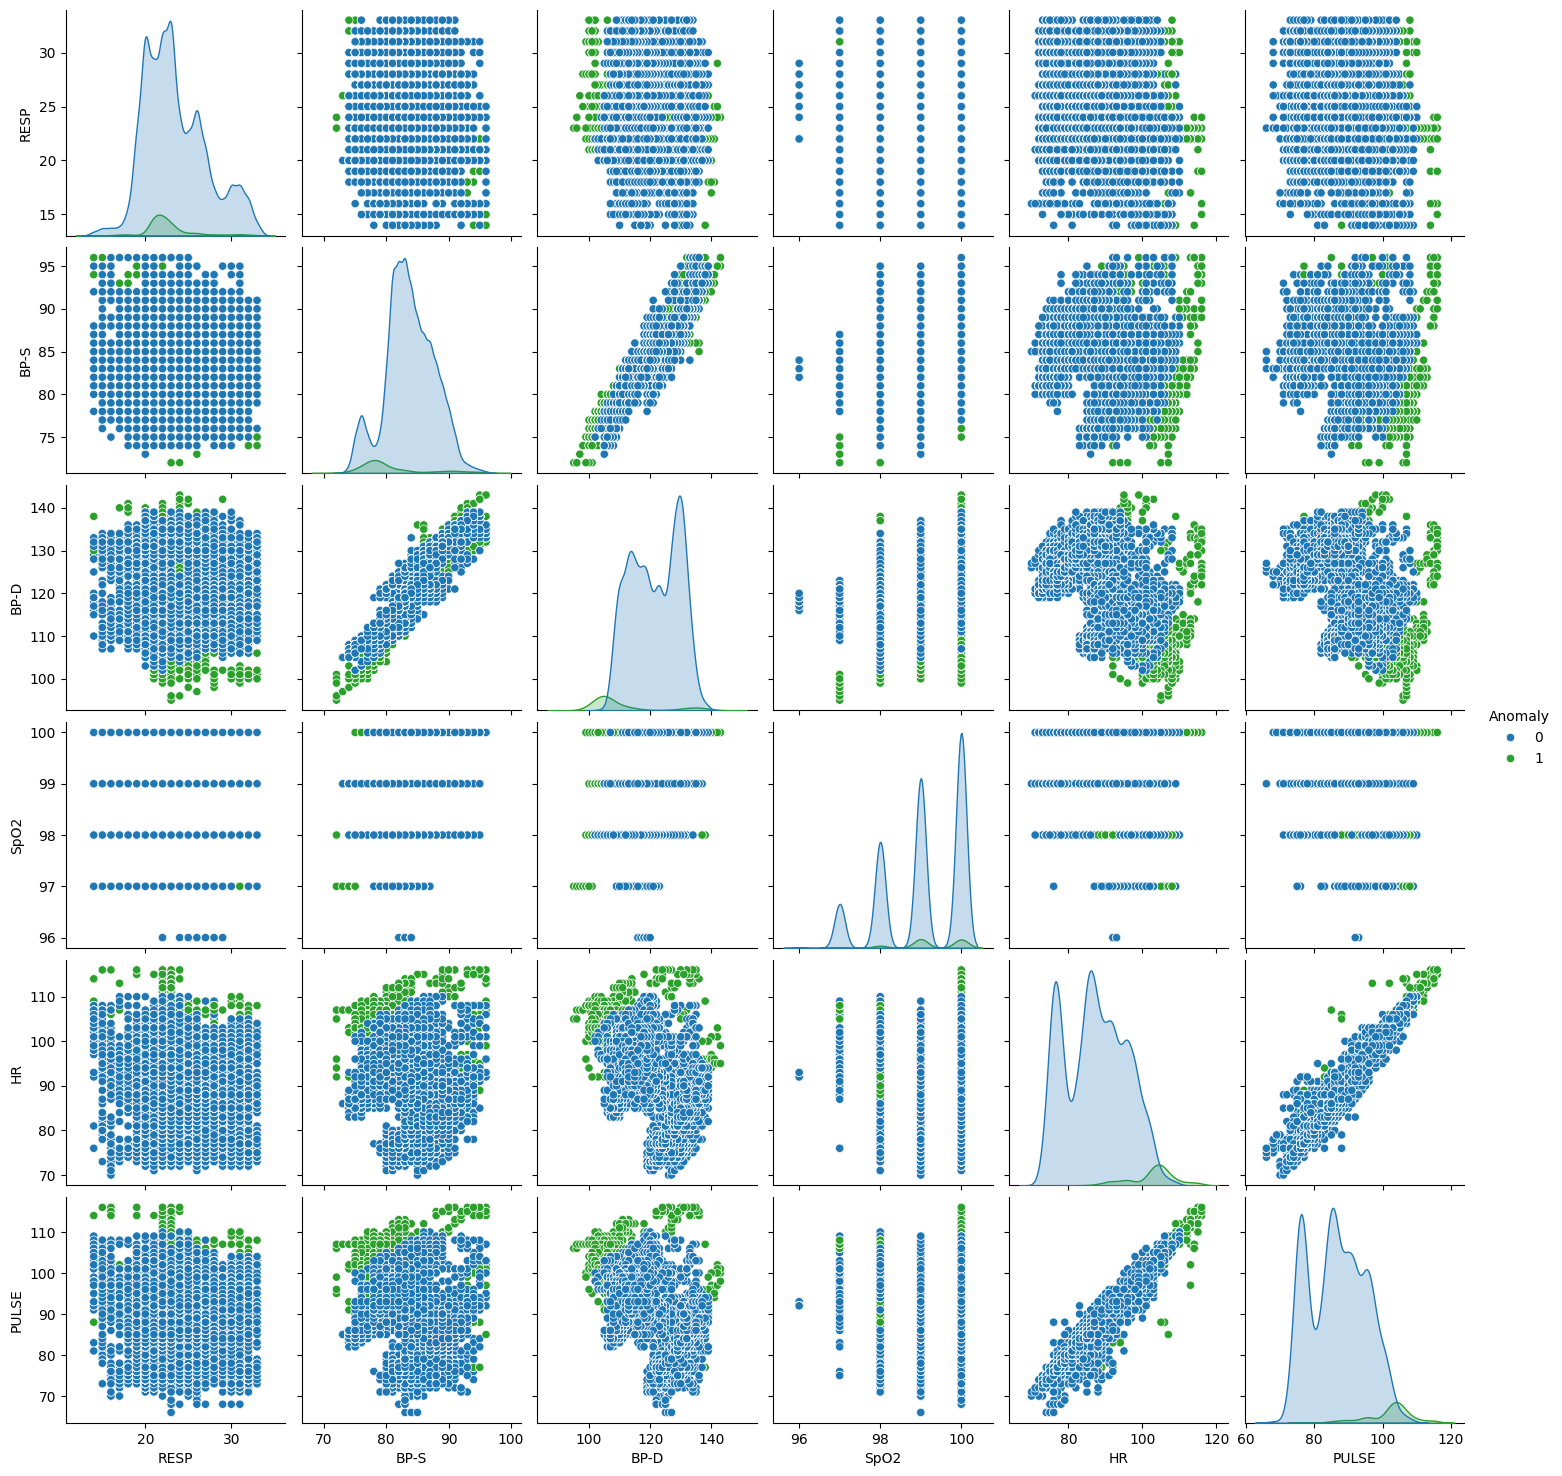

In [ ]:
#On patient-1 dataset
features = ['RESP', 'BP-S', 'BP-D', 'SpO2', 'HR', 'PULSE', 'Anomaly']

custom_palette = {0: "#1f77b4", 1: "#2ca02c"}

sns.pairplot(df1[features], hue='Anomaly', diag_kind='kde', palette=custom_palette)

plt.show()

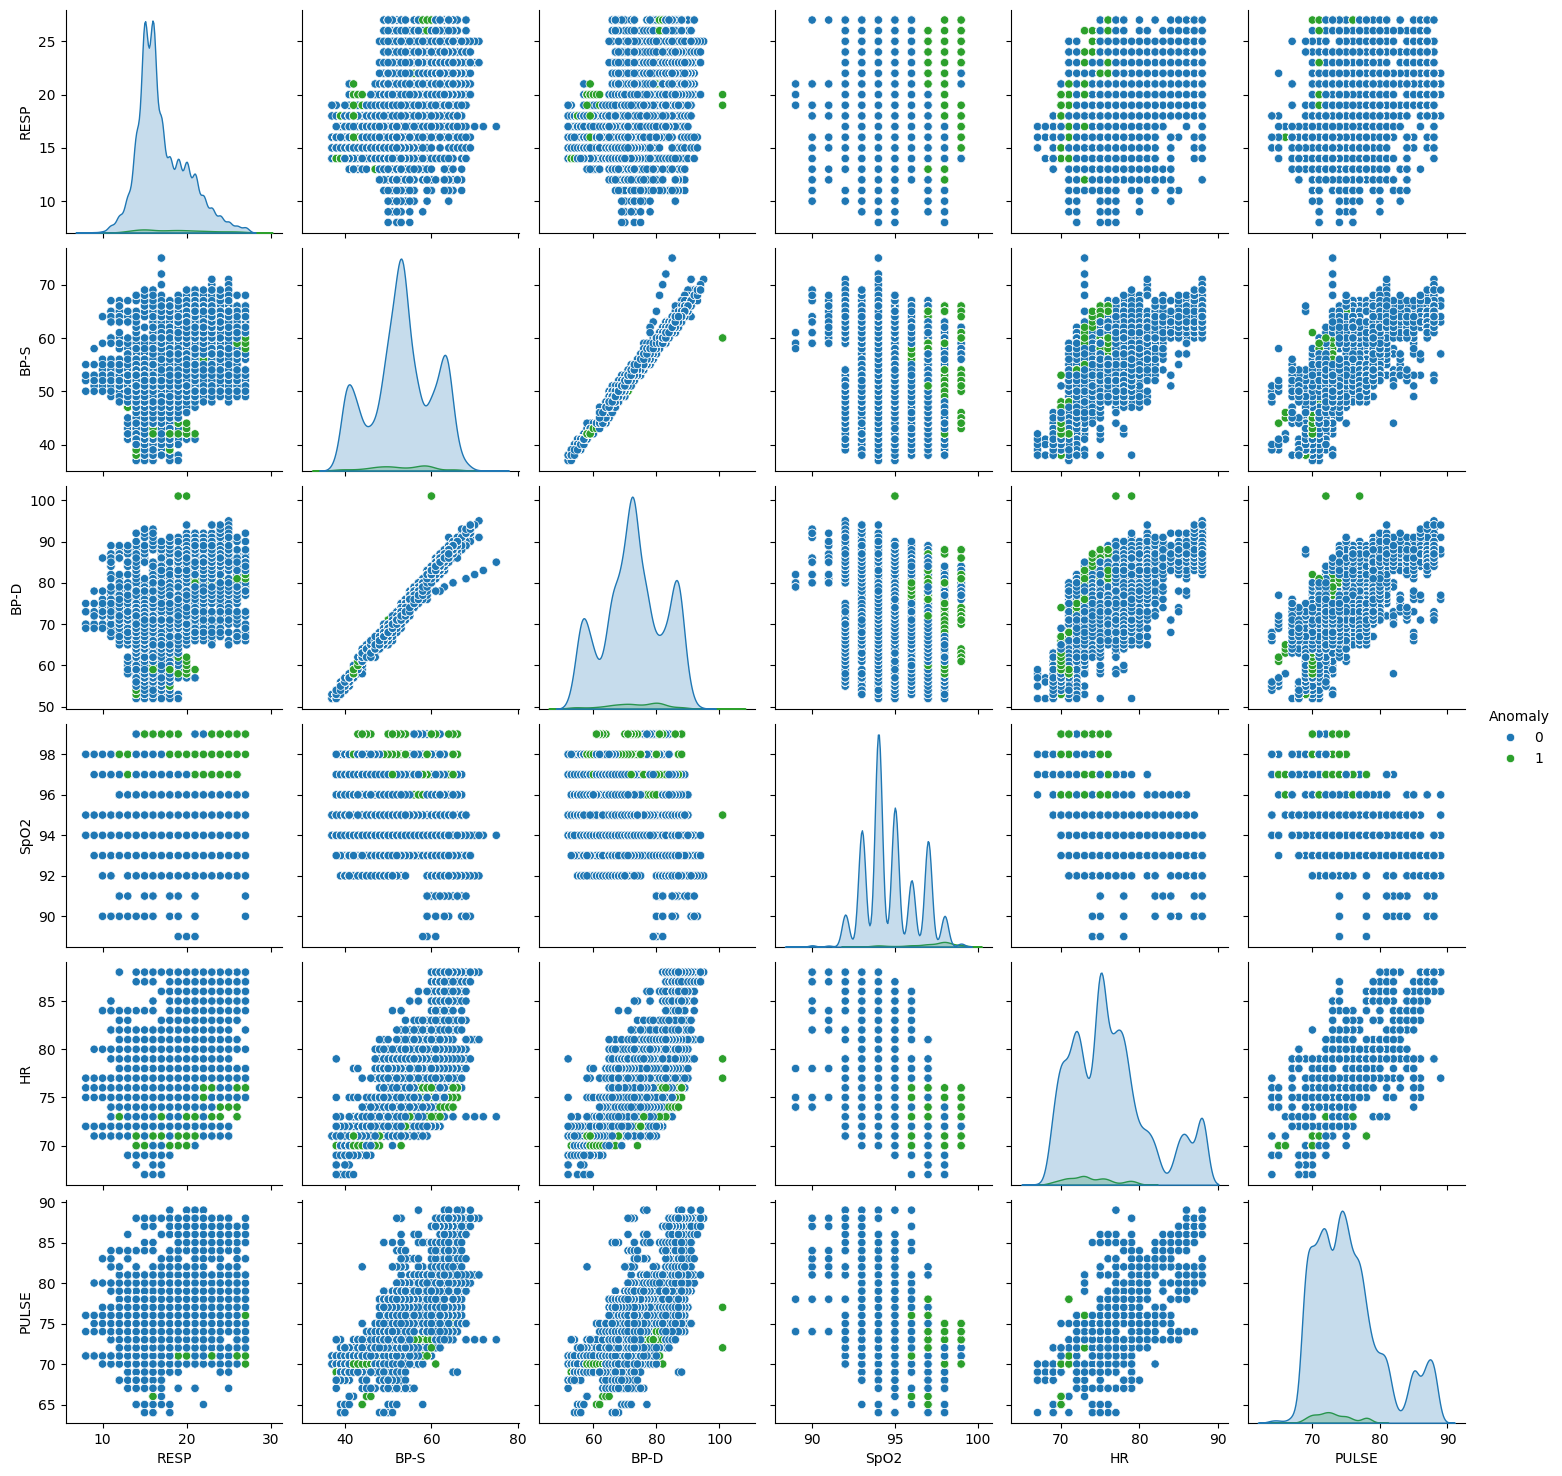

In [ ]:
#On patient-2 dataset
features = ['RESP', 'BP-S', 'BP-D', 'SpO2', 'HR', 'PULSE', 'Anomaly']

custom_palette = {0: "#1f77b4", 1: "#2ca02c"}

sns.pairplot(df2[features], hue='Anomaly', diag_kind='kde', palette=custom_palette)

plt.show()

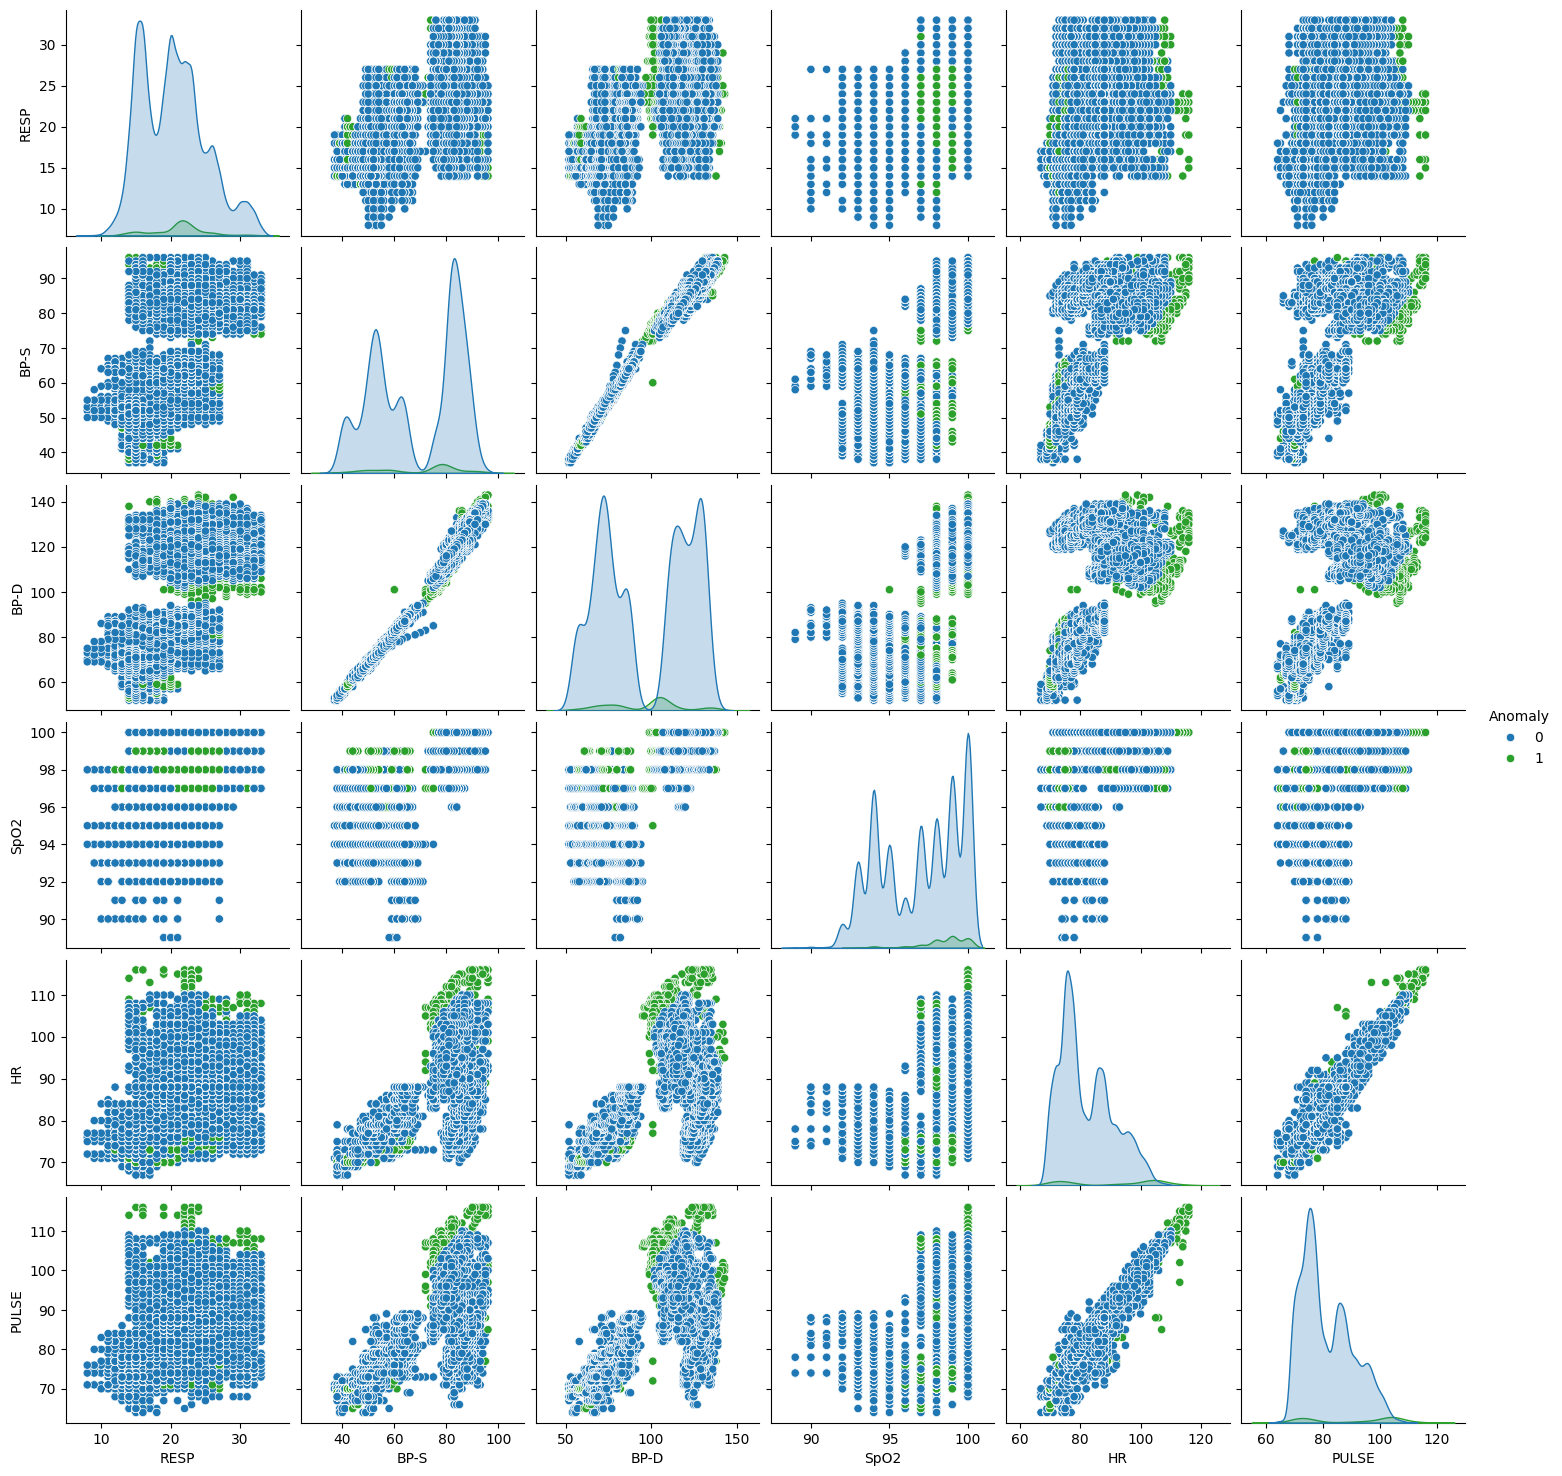

In [ ]:
#On a combined dataset of both patient-1 and patient-2
df3 = pd.concat([df1, df2])
custom_palette = {0: "#1f77b4", 1: "#2ca02c"}

sns.pairplot(df3[features], hue='Anomaly', diag_kind='kde', palette=custom_palette)

plt.show()

### Gradient Boosting Decision Trees

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.metrics import accuracy_score, log_loss
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

In [ ]:
features = ['RESP', 'BP-S', 'BP-D', 'SpO2', 'HR', 'PULSE']
target = 'Anomaly'

X = df2[features]
y = df2[target]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

##### Using GridSearchCV to get the model with the most suitable hyperparameters

In [ ]:
gbdt_param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5],
    'subsample': [0.8, 1.0]
}

gbdt_model = GradientBoostingClassifier(random_state=42)

grid_search_gbdt = GridSearchCV(gbdt_model, gbdt_param_grid, cv=5, scoring='accuracy')
grid_search_gbdt.fit(X_train, y_train)

best_gbdt_model = grid_search_gbdt.best_estimator_


##### Values of the best fit hyperparameters



In [ ]:
best_params = grid_search_gbdt.best_params_

print("Best hyperparameters selected by GridSearchCV:")
print(best_params)

Best hyperparameters selected by GridSearchCV:
{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200, 'subsample': 1.0}


Learning rate (0.1): Slower, more cautious learning.

Max depth (5): Moderately complex trees.

Number of trees (200): A reasonable number of trees to build, helping to reduce bias.

Subsample (1.0): Uses the entire dataset for each tree, maximizing the information for each tree.

Overall Accuracy and Logloss of our best fit model

In [ ]:
y_pred_gbdt = best_gbdt_model.predict(X_test)
y_pred_gbdt_proba = best_gbdt_model.predict_proba(X_test)

gbdt_accuracy = accuracy_score(y_test, y_pred_gbdt)
gbdt_log_loss = log_loss(y_test, y_pred_gbdt_proba)

print(f"Best GBDT Accuracy: {gbdt_accuracy:.4f}")
print(f"Best GBDT Log Loss: {gbdt_log_loss:.4f}")

Best GBDT Accuracy: 0.9966
Best GBDT Log Loss: 0.0086


Higher accuracy implies most of the predictions are correct

Lower logloss implies that the model is highly confident and has very low uncertainity

### Comparing RF and GBDT

##### GBDT Accuracy, LogLoss vs Number of Trees
Staged training of our model inorder to get the two vectors of accuracy and logloss and plotting them with the number of trees

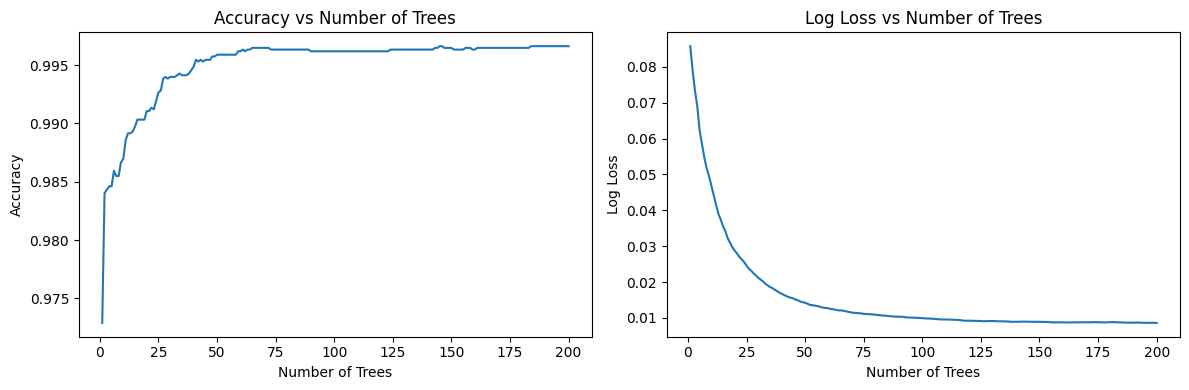

In [ ]:
numtrees=best_gbdt_model.n_estimators_
accuracyscores=[]
loglosses=[]

for i in range(1,numtrees+1):
  y_pred_gbdt = best_gbdt_model.staged_predict(X_test)
  y_pred_gbdt_proba = best_gbdt_model.staged_predict_proba(X_test)

  y_pred_gbdt=list(y_pred_gbdt)
  y_pred_gbdt_proba=list(y_pred_gbdt_proba)

  accuracyscores.append(accuracy_score(y_test, y_pred_gbdt[i - 1]))
  loglosses.append(log_loss(y_test, y_pred_gbdt_proba[i - 1]))

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(np.arange(1, numtrees + 1), accuracyscores, label='Accuracy')
plt.xlabel('Number of Trees')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Number of Trees')

plt.subplot(1, 2, 2)
plt.plot(np.arange(1, numtrees + 1), loglosses, label='Log Loss')
plt.xlabel('Number of Trees')
plt.ylabel('Log Loss')
plt.title('Log Loss vs Number of Trees')

plt.tight_layout()
plt.show()


##### Random Forest Accuracy, Log Loss vs Number of Trees
Tfdf random forest already has training log function once we declare it as inspector, hence we can directly plot them with number of trees

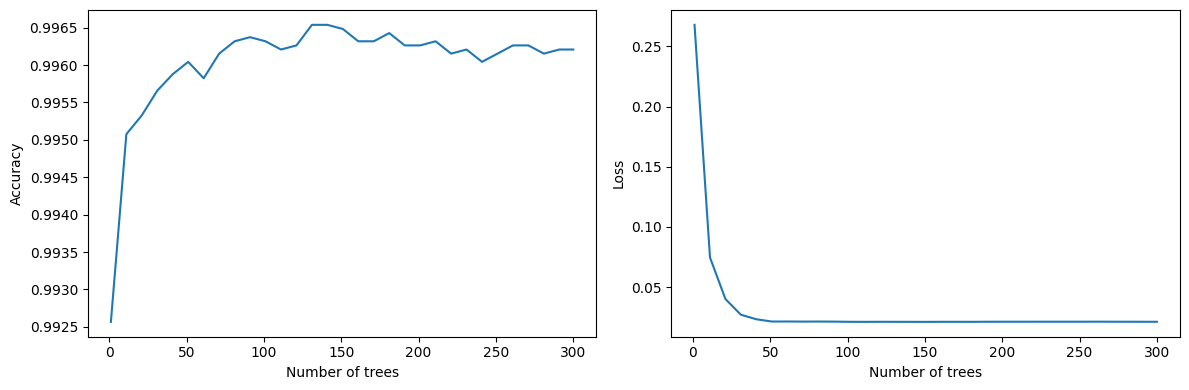

In [ ]:
logs = rfmodel.make_inspector().training_logs()

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot([log.num_trees for log in logs], [log.evaluation.accuracy for log in logs])
plt.xlabel("Number of trees")
plt.ylabel("Accuracy")

plt.subplot(1, 2, 2)
plt.plot([log.num_trees for log in logs], [log.evaluation.loss for log in logs])
plt.xlabel("Number of trees")
plt.ylabel("Loss")

plt.tight_layout()
plt.show()

##### GBDT VS Random Forest

The most important difference between Gradient Boosted Decision Trees and Random Forests is that in GBDT the trees are trained sequentially, where each tree tries to correct errors from the previous one.

Thus, Random Forest is a simpler model, more prone to underfitting. While, GBDT is more prone to overfitting.

As we can see from the graphs above, the benefit of increasing number of trees saturates for GBDT model at around 75 trees, where there is an increase in accuracy for Random Forest till around 150 trees. Also, logloss increases more drastically when number of trees is increasing in the case of Random Forest. This hints at the fact that increasing n_estimators parameter is more helpful in the case of Random Forest. Meanwhile, for GBDT, a high learning rate with too many trees will likely lead to overfitting, while too few trees can lead to underfitting. Hence we need to be careful while selecting the hyperparameters.

Thus, Random Forest is less prone to overfitting due to hyper-parameter tuning as each tree is independent of the previous one. While, GBDT requires careful choosing of hyper-parameters to prevent overfitting.

Trees being independent in Random Forest may also lead to computational inefficiency but this can be handled by parallelization.





### Feature Importances

##### Gradient Boosted Decision Trees feature importances

Sklearn GBDT has inbuilt feature importances, below is the plotted histogram of the same

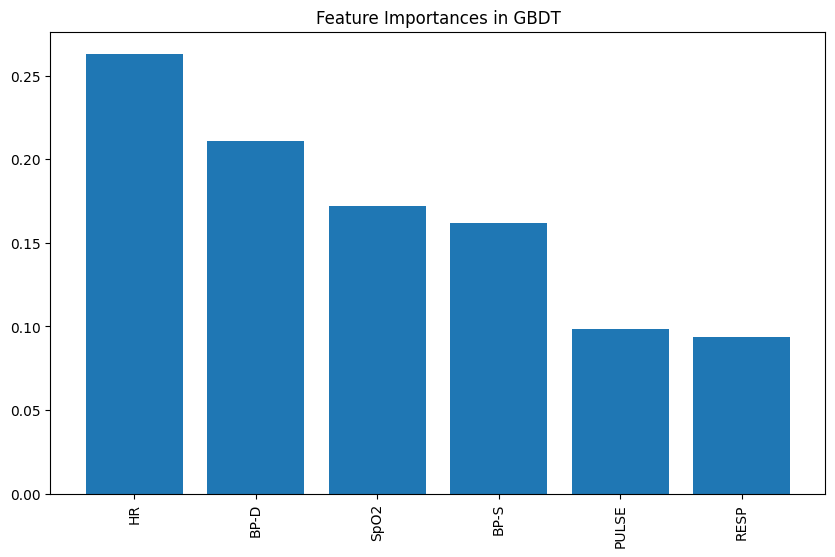

In [ ]:
feature_importances = best_gbdt_model.feature_importances_
feature_names = ['RESP', 'BP-S', 'BP-D', 'SpO2', 'HR', 'PULSE']

feature_importances_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_importances_df)), feature_importances_df['Importance'], align="center")
plt.xticks(range(len(feature_importances_df)), feature_importances_df['Feature'], rotation=90)
plt.title("Feature Importances in GBDT")
plt.show()

From the GBDT feature importances, we can see that Heart Rate is the most important feature, followed by Diastolic BP, SpO2, Systolic BP, Pulse and then Respiratory Rate

##### Random Forest feature importances

In [ ]:
inspector = rfmodel.make_inspector()
inspector.evaluation()

Evaluation(num_examples=18196, accuracy=0.9962079577929215, loss=0.021093108118027545, rmse=None, ndcg=None, aucs=None, auuc=None, qini=None)

In [ ]:
print(f"Available variable importances:")
for importance in inspector.variable_importances().keys():
  print("\t", importance)

Available variable importances:
	 NUM_AS_ROOT
	 NUM_NODES
	 INV_MEAN_MIN_DEPTH
	 SUM_SCORE


In [ ]:
inspector.variable_importances()

{'NUM_AS_ROOT': [("SpO2" (1; #5), 196.0),
  ("PULSE" (1; #3), 56.0),
  ("HR" (1; #2), 48.0)],
 'NUM_NODES': [("BP-D" (1; #0), 6513.0),
  ("RESP" (1; #4), 6180.0),
  ("BP-S" (1; #1), 5117.0),
  ("PULSE" (1; #3), 4280.0),
  ("HR" (1; #2), 4273.0),
  ("SpO2" (1; #5), 2914.0)],
 'INV_MEAN_MIN_DEPTH': [("SpO2" (1; #5), 0.6261366654807619),
  ("RESP" (1; #4), 0.25557402864373535),
  ("HR" (1; #2), 0.23141444012032067),
  ("BP-D" (1; #0), 0.18172020365494088),
  ("BP-S" (1; #1), 0.1767270883074927),
  ("PULSE" (1; #3), 0.16640873108837964)],
 'SUM_SCORE': [("SpO2" (1; #5), 182736.01575850858),
  ("HR" (1; #2), 132633.73188219732),
  ("RESP" (1; #4), 112168.16405613767),
  ("BP-D" (1; #0), 107942.55536133988),
  ("BP-S" (1; #1), 93380.30681148465),
  ("PULSE" (1; #3), 85321.98989072937)]}

Higher SUM_SCORE means more important

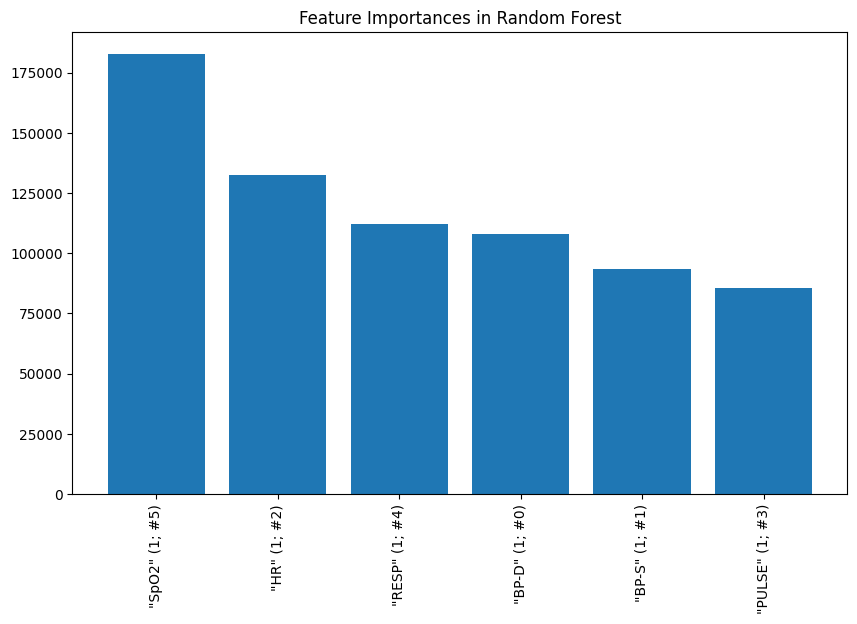

In [ ]:
features=[]
importances=[]
for(variable, importance) in inspector.variable_importances()['SUM_SCORE']:
    features.append(variable)
    importances.append(importance)

plt.figure(figsize=(10, 6))
plt.bar(range(len(importances)), importances, align="center")
plt.xticks(range(len(importances)), features, rotation=90)
plt.title("Feature Importances in Random Forest")
plt.show()

In RandomForest Model, SpO2 has most importance, followed by HR,RESP, BP-D,BP-s and Pulse

### Gradient Boosting Classifier using Tensorflow Library

In [ ]:
train_data = X_train.copy()
train_data['Anomaly'] = y_train

test_data = X_test.copy()
test_data['Anomaly'] = y_test

train_ds = tfdf.keras.pd_dataframe_to_tf_dataset(train_data, label="Anomaly")
test_ds = tfdf.keras.pd_dataframe_to_tf_dataset(test_data, label="Anomaly")

In [ ]:
tfdf_gbdt_model = tfdf.keras.GradientBoostedTreesModel()

tfdf_gbdt_model.fit(train_ds)

Use /tmp/tmp9g5vsj1j as temporary training directory
Reading training dataset...
Training dataset read in 0:00:00.339675. Found 15921 examples.
Training model...
Model trained in 0:00:02.439590
Compiling model...
Model compiled.


In [ ]:
inspector = tfdf_gbdt_model.make_inspector()
inspector.evaluation()

Evaluation(num_examples=None, accuracy=0.9980793595314026, loss=0.011682247743010521, rmse=None, ndcg=None, aucs=None, auuc=None, qini=None)

In [ ]:
print(f"Available variable importances:")
for importance in inspector.variable_importances().keys():
  print("\t", importance)

Available variable importances:
	 NUM_NODES
	 SUM_SCORE
	 INV_MEAN_MIN_DEPTH
	 NUM_AS_ROOT


In [ ]:
inspector.variable_importances()

{'NUM_NODES': [("BP-D" (1; #0), 1144.0),
  ("RESP" (1; #4), 971.0),
  ("BP-S" (1; #1), 847.0),
  ("PULSE" (1; #3), 834.0),
  ("HR" (1; #2), 813.0),
  ("SpO2" (1; #5), 810.0)],
 'SUM_SCORE': [("HR" (1; #2), 281.01081173992947),
  ("BP-D" (1; #0), 242.81646265463215),
  ("SpO2" (1; #5), 206.72951331328966),
  ("BP-S" (1; #1), 203.15200283661977),
  ("PULSE" (1; #3), 175.0060208620886),
  ("RESP" (1; #4), 116.44194884455945)],
 'INV_MEAN_MIN_DEPTH': [("SpO2" (1; #5), 0.3616417950561784),
  ("RESP" (1; #4), 0.2947915820550124),
  ("BP-D" (1; #0), 0.26826964152041505),
  ("BP-S" (1; #1), 0.23380519782769293),
  ("HR" (1; #2), 0.22899008837763513),
  ("PULSE" (1; #3), 0.2284080252748713)],
 'NUM_AS_ROOT': [("SpO2" (1; #5), 102.0),
  ("RESP" (1; #4), 40.0),
  ("BP-D" (1; #0), 38.0),
  ("BP-S" (1; #1), 10.0),
  ("PULSE" (1; #3), 8.0),
  ("HR" (1; #2), 1.0)]}

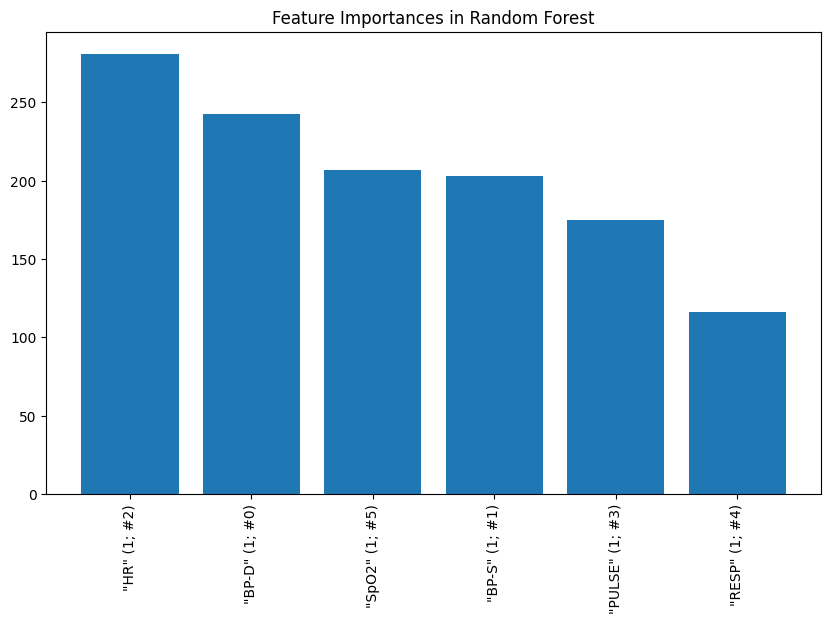

In [ ]:
features=[]
importances=[]
for(variable, importance) in inspector.variable_importances()['SUM_SCORE']:
    features.append(variable)
    importances.append(importance)

plt.figure(figsize=(10, 6))
plt.bar(range(len(importances)), importances, align="center")
plt.xticks(range(len(importances)), features, rotation=90)
plt.title("Feature Importances in Random Forest")
plt.show()

We can see that the sklearn's GBDT classifier and tfdf's gbdt classifier, both give the same order of feature importance